Saving masked_image_0 (5).png to masked_image_0 (5) (3).png
Saving masked_image_0 (4).png to masked_image_0 (4) (3).png
Imagen original del pie izquierdo:


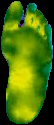

Imagen del pie derecho después de voltearla horizontalmente:


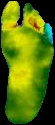

No se encontraron suficientes coincidencias entre las imágenes para realizar el registro.


In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

def register_images(img1, img2):
    # Voltear horizontalmente la imagen del pie derecho
    img2_flipped = cv2.flip(img2, 1)

    print("Imagen original del pie izquierdo:")
    cv2_imshow(img1)
    print("Imagen del pie derecho después de voltearla horizontalmente:")
    cv2_imshow(img2_flipped)

    # Inicializar el detector AKAZE
    akaze = cv2.AKAZE_create()

    # Detectar puntos clave y descriptores
    kp1, des1 = akaze.detectAndCompute(img1, None)
    kp2, des2 = akaze.detectAndCompute(img2_flipped, None)

    # Usar el matcher BFMatcher para encontrar las coincidencias
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = bf.knnMatch(des1, des2, k=2)

    # Aplicar la relación de Lowe para filtrar coincidencias
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Verificar si hay suficientes coincidencias buenas
    if len(good_matches) < 4:
        print("No se encontraron suficientes coincidencias entre las imágenes para realizar el registro.")
        return None

    # Extraer las ubicaciones de los puntos coincidentes
    points1 = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    points2 = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Calcular la matriz de homografía
    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

    # Usar esta matriz para transformar la imagen volteada
    height, width, channels = img2_flipped.shape
    img1_reg = cv2.warpPerspective(img1, h, (width, height))

    return img1_reg

# Cargar las imágenes
uploaded = files.upload()
if len(uploaded) < 2:
    raise ValueError("Por favor, carga al menos dos imágenes.")

img_paths = list(uploaded.keys())
img_left_path = img_paths[0]  # Usamos el primer archivo cargado
img_right_path = img_paths[1]  # Usamos el segundo archivo cargado

img_left = cv2.imread(img_left_path, cv2.IMREAD_COLOR)
img_right = cv2.imread(img_right_path, cv2.IMREAD_COLOR)

# Verificar que las imágenes se hayan cargado correctamente
if img_left is None:
    raise ValueError(f"No se pudo cargar la imagen desde {img_left_path}")
if img_right is None:
    raise ValueError(f"No se pudo cargar la imagen desde {img_right_path}")

# Registrar las imágenes
img_registered = register_images(img_left, img_right)

if img_registered is not None:
    # Mostrar la imagen registrada
    print("Resultado después del registro:")
    cv2_imshow(img_registered)

In [2]:
import imutils
import numpy as пp
from google.colab.patches import cv2_imshow

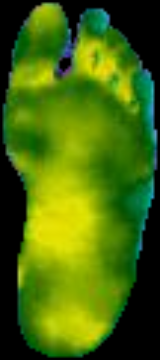

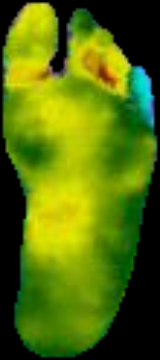

In [3]:
 # Load the two images (city)
img1 = img_left
img1 = cv2.resize(img1, (160, 360) )
img2 = img_right
img2 = cv2.flip(img2, 1)
img2 = cv2.resize(img2, (160,360) )
cv2_imshow(img1)
cv2_imshow(img2)


#cv2.waitKey(0)
#cv2.destroyAllWindows ()

In [4]:
def find_largest_contour_area(image):
    """Encuentra el área del contorno más grande en la imagen."""
    # Convertir la imagen a escala de grises
    gray_aux = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Binarizar la imagen
    _, thresh = cv2.threshold(gray_aux, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Encontrar contornos
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Si no se encontraron contornos, regresar un área de 0
    if not contours:
        return 0

    # Encontrar el contorno con el área más grande
    largest_contour = max(contours, key=cv2.contourArea)

    return cv2.contourArea(largest_contour)

# Cargar las imágenes (asumiendo que ya las has cargado previamente)
img_left_area = find_largest_contour_area(img_left)
img_right_area = find_largest_contour_area(img_right)

if img_left_area < img_right_area:
    print("El pie en la primera imagen (izquierda) es más pequeño.")
elif img_left_area > img_right_area:
    print("El pie en la segunda imagen (derecha) es más pequeño.")
else:
    print("Ambos pies parecen tener un tamaño similar en las imágenes.")

El pie en la primera imagen (izquierda) es más pequeño.


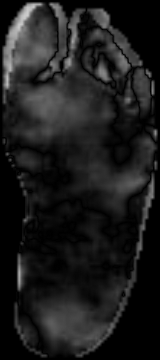

In [5]:
# Grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray_img1 = gray1
gray_img2 = gray2
# Find the difference between the two images using absdiff
diff = cv2.absdiff(gray1, gray2)
cv2_imshow(diff)

# cv2_imshow(img1)
# cv2_imshow(img2)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


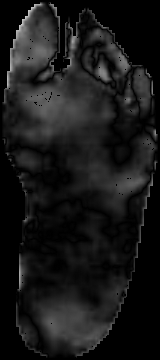

In [6]:
diff[diff == gray1] = 0
diff[diff == gray2] = 0
cv2_imshow(diff)

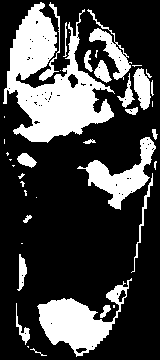

In [7]:
# Apply threshold
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)


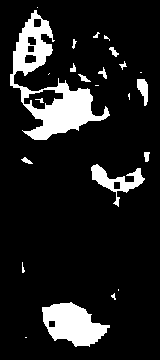

In [8]:
# import numpy as np
kernel = np.ones((6,6), np.uint16)
dilate = cv2.erode(thresh, kernel, iterations=1)
cv2_imshow(dilate)

In [9]:
# Find contours
contours = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

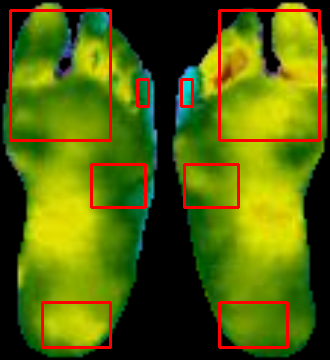

In [10]:
import numpy as np
# Loop over each contour
for contour in contours:
  if cv2.contourArea(contour) > 100 and cv2.contourArea(contour) < 6000 :
    # Calculate bounding box
    x, y, w, h= cv2.boundingRect (contour)
    # Draw rectangle - bounding box
    cv2.rectangle(img1, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (0,0,255), 2)

# Show final images with differences
x = np.zeros((360,10,3), np.uint8)
result = np.hstack((img1, x, cv2.flip(img2, 1)))
cv2_imshow(result)

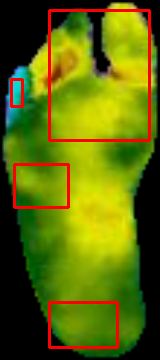

In [11]:

# Encontrar el píxel más brillante (representa la mayor temperatura)
max_temp_img1 = np.max(gray_img1)
max_temp_img2 = np.max(gray_img2)

if max_temp_img1 > max_temp_img2:
    img_to_plot = img1
else:
    img_to_plot = cv2.flip(img2, 1)

# Mostrar la imagen con la mayor temperatura
cv2_imshow(img_to_plot)
# cv2.waitKey(0)
# cv2.destroyAllWindows()